<a href="https://colab.research.google.com/github/pruthviraj2453/bayesian_network_analysis/blob/main/pgm_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
!pip install pgmpy
import pgmpy

from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#df=pd.read_csv('', encoding='utf-8')                           # YOU MAY NEED TO CHANGE THE PATH HERE


In [ ]:
 #df.shape



df=pd.read_csv('/content/FORMED_DATA.csv')
df

,PCLRfacet3,AbilityToCope,Stress,ProblematicLifeEvents,Victimisation,ViolentThoughts,Impulsivity,BPD,AbuseNeglectAsChild,PCLRfactor2,...,Hallucinations,HallucinationsPT,StrangeExperiences,StrangeExperiencesPT,ParanoidDelusions,ParanoidDelusionsPT,PsychiatricTreatment,PsychiatricTreatmentGivenRFAT,MentalIllnessSymptomCount,MentalIllnessDL
0,<3,High,No,No,No,No,Partly,No,No,5to9,...,No,No,No,No,No,No,No,No,MentalNPD,High
1,<3,High,Yes,No,No,No,Partly,No,No,10to14,...,Yes,Yes,No,No,No,No,No,No,MentalNPD,High
2,<3,High,No,No,No,No,Partly,No,No,10to14,...,No,No,No,No,Yes,Yes,No,No,ParanoidDelusions,High
3,<3,High,No,No,No,No,Partly,No,No,5to9,...,No,No,No,No,No,No,No,No,None,Low
4,<3,High,No,No,No,No,Partly,No,No,10to14,...,No,No,No,No,No,No,Yes,No,MentalNPD,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3to5,High,No,No,Yes,No,Partly,No,No,10to14,...,No,No,No,No,No,No,No,No,None,Low
99996,<3,High,No,Yes,No,No,Partly,No,No,5to9,...,No,No,No,No,No,No,No,No,MentalNPD,Low
99997,3to5,Low,No,No,No,No,Partly,Yes,Yes,5to9,...,Yes,Yes,No,No,No,No,No,No,MentalNPD,Low
99998,6to8,High,Yes,No,No,Yes,Partly,No,No,5to9,...,No,No,No,No,No,No,No,No,None,Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 88 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   PCLRfacet3                     100000 non-null  object
 1   AbilityToCope                  100000 non-null  object
 2   Stress                         100000 non-null  object
 3   ProblematicLifeEvents          100000 non-null  object
 4   Victimisation                  100000 non-null  object
 5   ViolentThoughts                100000 non-null  object
 6   Impulsivity                    100000 non-null  object
 7   BPD                            100000 non-null  object
 8   AbuseNeglectAsChild            100000 non-null  object
 9   PCLRfactor2                    100000 non-null  object
 10  ASPD                           100000 non-null  object
 11  CriminalNetwork                100000 non-null  object
 12  prioracq                       100000 non-nul

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



for col in df.columns:
    print(col)
    # Encode labels in column 'species'.
    df[col]= label_encoder.fit_transform(df[col])
    df[col].unique()


print(df)


PCLRfacet3
AbilityToCope
Stress
ProblematicLifeEvents
Victimisation
ViolentThoughts
Impulsivity
BPD
AbuseNeglectAsChild
PCLRfactor2
ASPD
CriminalNetwork
prioracq
Age
Gender
PriorViolentConvictions
pclrscore
TimeAtRisk
CriminalFamilyBackground
Education
Intelligence
EmploymentOrTraining
FinancialDifficulties
DomesticStability
GangMember
ComplianceWithSupervision
NegativeAttitude
CriminalAttitude
SymptomsOfMentalIllness
PCLRfactor1
RefuseFailToAttendTherapy
HazardousDrinkingAfterRelease
CannabisBeforePrisonSentence
CocaineBeforePrisonSentence
EcstasyBeforePrisonSentence
EcstasyDuringPrisonSentence
CannabisDuringPrisonSentence
CocaineDuringPrisonSentence
CannabisAfterRelease
CocaineAfterRelease
EcstasyAfterRelease
EcstasyDependence
AnyDrugDependence
CannabisDependence
CocaineDependence
AlcoholDependence
DrugTreatment
AlcoholTreatment
AlcoholTreatmentGivenRFAT
DrugTreatmentGivenRFAT
EcstasyPT
CannabisPT
CocainePT
SubstanceUse
SubstanceMisuseDL
Violence
ViolentConvictions
ResponsivenessToTr

In [ ]:
df.dropna(inplace = True)
df.shape                                                                        # There were none but it is a good practice

(100000, 88)

In [ ]:
df['MentalIllnessDL'].value_counts()

1    68811
0    31189
Name: MentalIllnessDL, dtype: int64

In [ ]:
for series_name in df.columns:
  print(series_name)
  print(df[series_name].value_counts())
  print('____________________________')

PCLRfacet3
1    37375
2    33385
4    19913
0     4861
3     4466
Name: PCLRfacet3, dtype: int64
____________________________
AbilityToCope
0    69815
1    30185
Name: AbilityToCope, dtype: int64
____________________________
Stress
0    80608
1    19392
Name: Stress, dtype: int64
____________________________
ProblematicLifeEvents
0    88803
1    11197
Name: ProblematicLifeEvents, dtype: int64
____________________________
Victimisation
0    79805
1    20195
Name: Victimisation, dtype: int64
____________________________
ViolentThoughts
0    83233
1    16767
Name: ViolentThoughts, dtype: int64
____________________________
Impulsivity
1    47830
2    37716
0    14454
Name: Impulsivity, dtype: int64
____________________________
BPD
0    80086
1    19914
Name: BPD, dtype: int64
____________________________
AbuseNeglectAsChild
0    65365
1    34635
Name: AbuseNeglectAsChild, dtype: int64
____________________________
PCLRfactor2
0    41903
2    31927
3    19869
1     6301
Name: PCLRfactor2, dt

In [ ]:
DAG=pd.read_csv('/content/DAGtrue_FORMED.csv')

In [ ]:
DAG

,ID,Variable 1,Dependency,Variable 2
0,1,Impulsivity,->,PCLRfacet3
1,2,Intelligence,->,AbilityToCope
2,3,AbilityToCope,->,Stress
3,4,FinancialDifficulties,->,Stress
4,5,ProblematicLifeEvents,->,Stress
...,...,...,...,...
133,134,ThoughtInsertionPT,->,MentalIllnessSymptomCount
134,135,HallucinationsPT,->,MentalIllnessSymptomCount
135,136,StrangeExperiencesPT,->,MentalIllnessSymptomCount
136,137,ParanoidDelusionsPT,->,MentalIllnessSymptomCount


In [ ]:
!pip install pgmpy
model_bayes = BayesianNetwork()
for index, row in DAG.iterrows():
    model_bayes.add_edge(row['Variable 1'],row['Variable 2'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


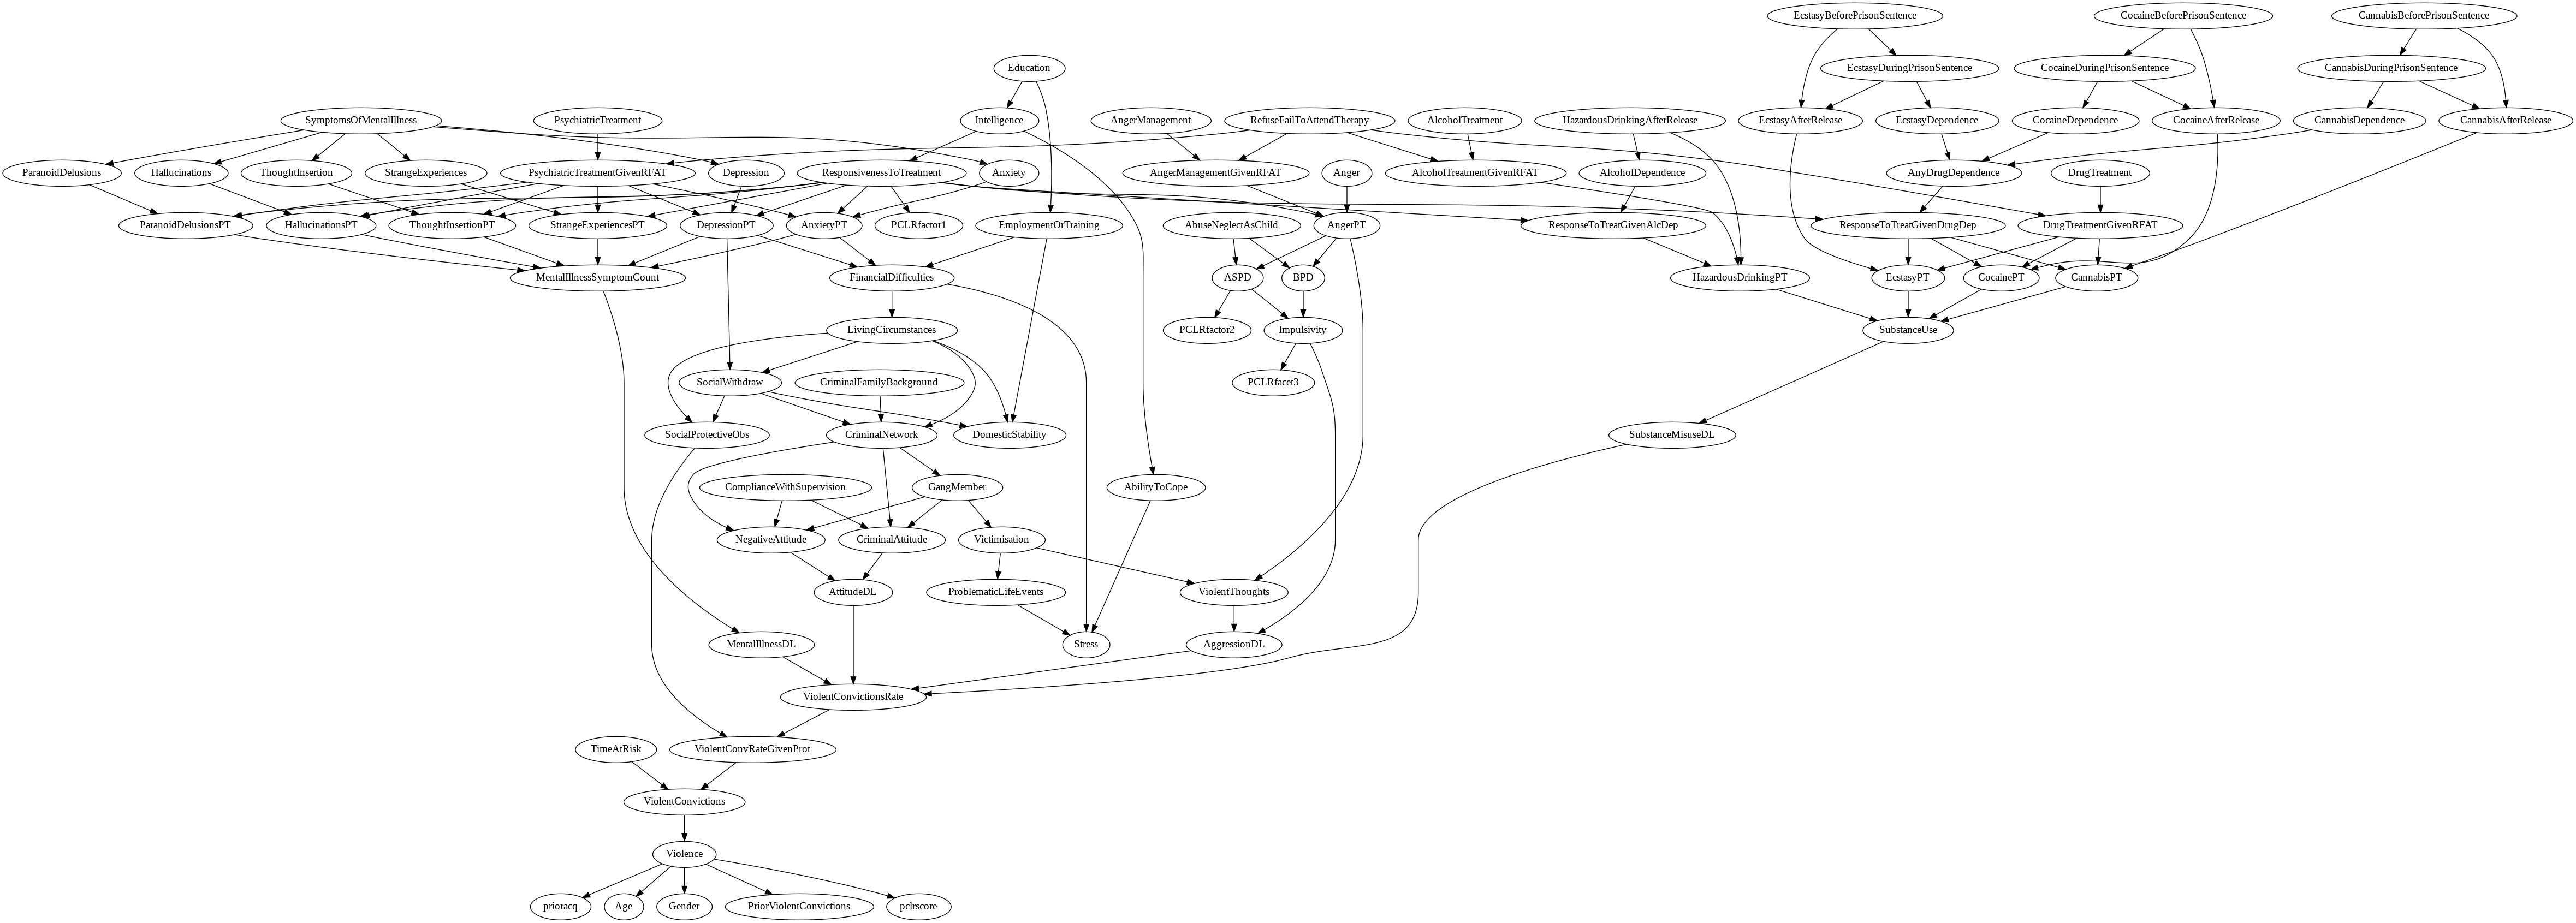

In [ ]:
display(Image((nx.drawing.nx_pydot.to_pydot(model_bayes)).create_png()))

In [ ]:
df.corr()

,PCLRfacet3,AbilityToCope,Stress,ProblematicLifeEvents,Victimisation,ViolentThoughts,Impulsivity,BPD,AbuseNeglectAsChild,PCLRfactor2,...,Hallucinations,HallucinationsPT,StrangeExperiences,StrangeExperiencesPT,ParanoidDelusions,ParanoidDelusionsPT,PsychiatricTreatment,PsychiatricTreatmentGivenRFAT,MentalIllnessSymptomCount,MentalIllnessDL
PCLRfacet3,1.000000,-0.001749,0.004559,0.001204,0.003326,-0.003692,-0.293181,-0.044948,-0.011183,0.081518,...,0.000541,-0.000929,0.004874,0.004834,-0.000594,-0.000521,0.004414,0.004850,0.000864,0.002149
AbilityToCope,-0.001749,1.000000,0.156395,-0.002198,0.004457,0.004833,-0.001517,-0.004966,-0.003368,-0.000737,...,-0.000535,0.000854,-0.001164,-0.000661,-0.001151,-0.000185,0.004987,0.006291,-0.002575,0.002652
Stress,0.004559,0.156395,1.000000,0.117885,0.010445,-0.000911,-0.003476,0.001981,-0.007039,0.008430,...,0.002620,0.001748,-0.002010,-0.000391,0.003805,0.005120,-0.001795,-0.003435,-0.004173,-0.004631
ProblematicLifeEvents,0.001204,-0.002198,0.117885,1.000000,0.093748,0.015416,-0.001607,-0.002841,0.000395,0.005160,...,-0.000488,-0.001094,-0.001051,-0.004127,-0.006683,-0.006295,0.000532,0.003872,-0.006089,0.003644
Victimisation,0.003326,0.004457,0.010445,0.093748,1.000000,0.161690,-0.002578,-0.002347,0.002694,0.005981,...,0.001033,-0.001494,0.000457,0.001411,0.003765,0.002341,0.003200,0.001867,-0.000406,-0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ParanoidDelusionsPT,-0.000521,-0.000185,0.005120,-0.006295,0.002341,0.003360,0.002288,0.001951,0.003613,0.001040,...,0.050483,0.077721,0.031001,0.054211,0.899682,1.000000,-0.109908,-0.141397,0.780278,-0.600045
PsychiatricTreatment,0.004414,0.004987,-0.001795,0.000532,0.003200,0.005920,0.000904,0.002868,0.001156,-0.005386,...,-0.003990,-0.119123,-0.003663,-0.100637,0.001270,-0.109908,1.000000,0.811618,0.055740,0.141771
PsychiatricTreatmentGivenRFAT,0.004850,0.006291,-0.003435,0.003872,0.001867,0.005961,-0.000212,0.000330,0.002796,-0.004097,...,-0.003811,-0.145614,-0.002905,-0.122261,-0.003991,-0.141397,0.811618,1.000000,0.063852,0.176321
MentalIllnessSymptomCount,0.000864,-0.002575,-0.004173,-0.006089,-0.000406,0.001019,0.001501,0.001612,-0.000278,-0.000504,...,-0.153378,-0.177664,-0.095205,-0.109867,0.729065,0.780278,0.055740,0.063852,1.000000,-0.271848


In [ ]:
#!/usr/bin/env python
import numpy as np
from scipy.special import gammaln
from math import lgamma, log

from pgmpy.estimators import BaseEstimator


class StructureScore(BaseEstimator):
    def __init__(self, data, **kwargs):
        """
        Abstract base class for structure scoring classes in pgmpy. Use any of the derived classes
        K2Score, BDeuScore, or BicScore. Scoring classes are
        used to measure how well a model is able to describe the given data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        Reference
        ---------
        Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3
        """
        super(StructureScore, self).__init__(data, **kwargs)

    def score(self, model):
        """
        Computes a score to measure how well the given `BayesianNetwork` fits
        to the data set.  (This method relies on the `local_score`-method that
        is implemented in each subclass.)

        Parameters
        ----------
        model: BayesianNetwork instance
            The Bayesian network that is to be scored. Nodes of the BayesianNetwork need to coincide
            with column names of data set.

        Returns
        -------
        score: float
            A number indicating the degree of fit between data and model

        Examples
        --------
        >>> import pandas as pd
        >>> import numpy as np
        >>> from pgmpy.models import BayesianNetwork
        >>> from pgmpy.estimators import K2Score
        >>> # create random data sample with 3 variables, where B and C are identical:
        >>> data = pd.DataFrame(np.random.randint(0, 5, size=(5000, 2)), columns=list('AB'))
        >>> data['C'] = data['B']
        >>> K2Score(data).score(BayesianNetwork([['A','B'], ['A','C']]))
        -24242.367348745247
        >>> K2Score(data).score(BayesianNetwork([['A','B'], ['B','C']]))
        -16273.793897051042
        """

        score = 0
        for node in model.nodes():
            score += self.local_score(node, model.predecessors(node))
        score += self.structure_prior(model)
        return score

    def structure_prior(self, model):
        """A (log) prior distribution over models. Currently unused (= uniform)."""
        return 0

    def structure_prior_ratio(self, operation):
        """Return the log ratio of the prior probabilities for a given proposed change to the DAG.
        Currently unused (=uniform)."""
        return 0


class K2Score(StructureScore):
    def __init__(self, data, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with Dirichlet priors.
        The K2 score is the result of setting all Dirichlet hyperparameters/pseudo_counts to 1.
        The `score`-method measures how well a model is able to describe the given data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3.4-18.3.6 (esp. page 806)
        [2] AM Carvalho, Scoring functions for learning Bayesian networks,
        http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf
        """
        super(K2Score, self).__init__(data, **kwargs)

    def local_score(self, variable, parents):
        'Computes a score that measures how much a \
        given variable is "influenced" by a given list of potential parents.'

        var_states = self.state_names[variable]
        var_cardinality = len(var_states)
        state_counts = self.state_counts(variable, parents)
        num_parents_states = float(state_counts.shape[1])

        counts = np.asarray(state_counts)
        log_gamma_counts = np.zeros_like(counts, dtype=float)

        # Compute log(gamma(counts + 1))
        gammaln(counts + 1, out=log_gamma_counts)

        # Compute the log-gamma conditional sample size
        log_gamma_conds = np.sum(counts, axis=0, dtype=float)
        gammaln(log_gamma_conds + var_cardinality, out=log_gamma_conds)

        score = (
            np.sum(log_gamma_counts)
            - np.sum(log_gamma_conds)
            + num_parents_states * lgamma(var_cardinality)
        )

        return score



class BDeuScore(StructureScore):
    def __init__(self, data, equivalent_sample_size=10, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with Dirichlet priors.
        The BDeu score is the result of setting all Dirichlet hyperparameters/pseudo_counts to
        `equivalent_sample_size/variable_cardinality`.
        The `score`-method measures how well a model is able to describe the given data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        equivalent_sample_size: int (default: 10)
            The equivalent/imaginary sample size (of uniform pseudo samples) for the dirichlet hyperparameters.
            The score is sensitive to this value, runs with different values might be useful.

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3.4-18.3.6 (esp. page 806)
        [2] AM Carvalho, Scoring functions for learning Bayesian networks,
        http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf
        """
        self.equivalent_sample_size = equivalent_sample_size
        super(BDeuScore, self).__init__(data, **kwargs)

    def get_number_of_parent_states(self, state_counts):
        return float(state_counts.shape[1])

    def local_score(self, variable, parents):
        'Computes a score that measures how much a \
        given variable is "influenced" by a given list of potential parents.'

        var_states = self.state_names[variable]
        var_cardinality = len(var_states)
        state_counts = self.state_counts(variable, parents)
        num_parents_states = self.get_number_of_parent_states(state_counts)

        counts = np.asarray(state_counts)
        log_gamma_counts = np.zeros_like(counts, dtype=float)
        alpha = self.equivalent_sample_size / num_parents_states
        beta = self.equivalent_sample_size / counts.size
        # Compute log(gamma(counts + beta))
        gammaln(counts + beta, out=log_gamma_counts)

        # Compute the log-gamma conditional sample size
        log_gamma_conds = np.sum(counts, axis=0, dtype=float)
        gammaln(log_gamma_conds + alpha, out=log_gamma_conds)

        score = (
            np.sum(log_gamma_counts)
            - np.sum(log_gamma_conds)
            + num_parents_states * lgamma(alpha)
            - counts.size * lgamma(beta)
        )
        return score


class BDsScore(BDeuScore):
    def __init__(self, data, equivalent_sample_size=10, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with
        Dirichlet priors.  The BDs score is the result of setting all Dirichlet
        hyperparameters/pseudo_counts to
        `equivalent_sample_size/modified_variable_cardinality` where for the
        modified_variable_cardinality only the number of parent configurations
        where there were observed variable counts are considered.  The
        `score`-method measures how well a model is able to describe the given
        data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        equivalent_sample_size: int (default: 10)
            The equivalent/imaginary sample size (of uniform pseudo samples) for the dirichlet
            hyperparameters.
            The score is sensitive to this value, runs with different values might be useful.

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Scutari, Marco. An Empirical-Bayes Score for Discrete Bayesian Networks.
        Journal of Machine Learning Research, 2016, pp. 438–48

        """
        super(BDsScore, self).__init__(data, equivalent_sample_size, **kwargs)

    def get_number_of_parent_states(self, state_counts):
        return float(len(np.where(state_counts.sum(axis=0) > 0)[0]))

    def structure_prior_ratio(self, operation):
        """Return the log ratio of the prior probabilities for a given proposed change to
        the DAG.
        """
        if operation == "+":
            return -log(2.0)
        if operation == "-":
            return log(2.0)
        return 0


    def structure_prior(self, model):
        """
        Implements the marginal uniform prior for the graph structure where each arc
        is independent with the probability of an arc for any two nodes in either direction
        is 1/4 and the probability of no arc between any two nodes is 1/2."""
        nedges = float(len(model.edges()))
        nnodes = float(len(model.nodes()))
        possible_edges = nnodes * (nnodes - 1) / 2.0
        score = -(nedges + possible_edges) * log(2.0)
        return score



class BicScore(StructureScore):
   def __init__(self, data, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with
        Dirichlet priors.  The BIC/MDL score ("Bayesian Information Criterion",
        also "Minimal Descriptive Length") is a log-likelihood score with an
        additional penalty for network complexity, to avoid overfitting.  The
        `score`-method measures how well a model is able to describe the given
        data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3.4-18.3.6 (esp. page 802)
        [2] AM Carvalho, Scoring functions for learning Bayesian networks,
        http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf
        """
        super(BicScore, self).__init__(data, **kwargs)

   def local_score(self, variable, parents):
        'Computes a score that measures how much a \
        given variable is "influenced" by a given list of potential parents.'

        var_states = self.state_names[variable]
        var_cardinality = len(var_states)
        state_counts = self.state_counts(variable, parents)
        sample_size = len(self.data)
        num_parents_states = float(state_counts.shape[1])

        counts = np.asarray(state_counts)
        log_likelihoods = np.zeros_like(counts, dtype=float)

        # Compute the log-counts
        np.log(counts, out=log_likelihoods, where=counts > 0)

        # Compute the log-conditional sample size
        log_conditionals = np.sum(counts, axis=0, dtype=float)
        np.log(log_conditionals, out=log_conditionals, where=log_conditionals > 0)

        # Compute the log-likelihoods
        log_likelihoods -= log_conditionals
        log_likelihoods *= counts

        score = np.sum(log_likelihoods)
        score -= 0.5 * log(sample_size) * num_parents_states * (var_cardinality - 1)

        return score

In [ ]:
#!/usr/bin/env python

import logging
from itertools import chain, combinations, permutations

import networkx as nx
from joblib import Parallel, delayed
from tqdm.auto import tqdm

from pgmpy.base import PDAG
from pgmpy.estimators import StructureEstimator
from pgmpy.estimators.CITests import chi_square, independence_match, pearsonr
from pgmpy.global_vars import SHOW_PROGRESS

class PC(StructureEstimator):
    def __init__(self, data=None, independencies=None, **kwargs):
        """
        Class for constraint-based estimation of DAGs using the PC algorithm
        from a given data set.  Identifies (conditional) dependencies in data
        set using chi_square dependency test and uses the PC algorithm to
        estimate a DAG pattern that satisfies the identified dependencies. The
        DAG pattern can then be completed to a faithful DAG, if possible.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.  (If some
            values in the data are missing the data cells should be set to
            `numpy.NaN`.  Note that pandas converts each column containing
            `numpy.NaN`s to dtype `float`.)

        References
        ----------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques,
            2009, Section 18.2
        [2] Neapolitan, Learning Bayesian Networks, Section 10.1.2 for the PC algorithm (page 550), http://www.cs.technion.ac.il/~dang/books/Learning%20Bayesian%20Networks(Neapolitan,%20Richard).pdf
        """
        super(PC, self).__init__(data=data, independencies=independencies, **kwargs)

    def estimate(
        self,
        variant="stable",
        ci_test="chi_square",
        max_cond_vars=5,
        return_type="dag",
        significance_level=0.01,
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):
        """
        Estimates a DAG/PDAG from the given dataset using the PC algorithm which
        is a constraint-based structure learning algorithm[1]. The independencies
        in the dataset are identified by doing statistical independece test. This
        method returns a DAG/PDAG structure which is faithful to the independencies
        implied by the dataset

        Parameters
        ----------
        variant: str (one of "orig", "stable", "parallel")
            The variant of PC algorithm to run.
            "orig": The original PC algorithm. Might not give the same
                    results in different runs but does less independence
                    tests compared to stable.
            "stable": Gives the same result in every run but does needs to
                    do more statistical independence tests.
            "parallel": Parallel version of PC Stable. Can run on multiple
                    cores with the same result on each run.

        ci_test: str or fun
            The statistical test to use for testing conditional independence in
            the dataset. If `str` values should be one of:
                "independence_match": If using this option, an additional parameter
                        `independencies` must be specified.
                "chi_square": Uses the Chi-Square independence test. This works
                        only for discrete datasets.
                "pearsonr": Uses the pertial correlation based on pearson
                        correlation coefficient to test independence. This works
                        only for continuous datasets.

        max_cond_vars: int
            The maximum number of conditional variables allowed to do the statistical
            test with.

        return_type: str (one of "dag", "cpdag", "pdag", "skeleton")
            The type of structure to return.

            If `return_type=pdag` or `return_type=cpdag`: a partially directed structure                is returned.
            If `return_type=dag`, a fully directed structure is returned if it
                is possible to orient all the edges.
            If `return_type="skeleton", returns an undirected graph along
                with the separating sets.

        significance_level: float (default: 0.01)
            The statistical tests use this value to compare with the p-value of
            the test to decide whether the tested variables are independent or
            not. Different tests can treat this parameter differently:
                1. Chi-Square: If p-value > significance_level, it assumes that the
                    independence condition satisfied in the data.
                2. pearsonr: If p-value > significance_level, it assumes that the
                    independence condition satisfied in the data.

        Returns
        -------
        Estimated model: pgmpy.base.DAG, pgmpy.base.PDAG, or tuple(networkx.UndirectedGraph, dict)
                The estimated model structure, can be a partially directed graph (PDAG)
                or a fully directed graph (DAG), or (Undirected Graph, separating sets)
                depending on the value of `return_type` argument.

        References
        ----------
        [1] Original PC: P. Spirtes, C. Glymour, and R. Scheines, Causation,
                    Prediction, and Search, 2nd ed. Cambridge, MA: MIT Press, 2000.
        [2] Stable PC:  D. Colombo and M. H. Maathuis, “A modification of the PC algorithm
                    yielding order-independent skeletons,” ArXiv e-prints, Nov. 2012.
        [3] Parallel PC: Le, Thuc, et al. "A fast PC algorithm for high dimensional causal
                    discovery with multi-core PCs." IEEE/ACM transactions on computational
                    biology and bioinformatics (2016).

        Examples
        --------
        >>> import pandas as pd
        >>> import numpy as np
        >>> from pgmpy.estimators import PC
        >>> data = pd.DataFrame(np.random.randint(0, 5, size=(2500, 3)), columns=list('XYZ'))
        >>> data['sum'] = data.sum(axis=1)
        >>> print(data)
              X  Y  Z  sum
        0     3  0  1    4
        1     1  4  3    8
        2     0  0  3    3
        3     0  2  3    5
        4     2  1  1    4
        ...  .. .. ..  ...
        2495  2  3  0    5
        2496  1  1  2    4
        2497  0  4  2    6
        2498  0  0  0    0
        2499  2  4  0    6
        [2500 rows x 4 columns]
        >>> c = PC(data)
        >>> model = c.estimate()
        >>> print(model.edges())
        [('Z', 'sum'), ('X', 'sum'), ('Y', 'sum')]
        """
        # Step 0: Do checks that the specified parameters are correct, else throw meaningful error.
        if variant not in ("orig", "stable", "parallel"):
            raise ValueError(
                f"variant must be one of: orig, stable, or parallel. Got: {variant}"
            )
        elif (not callable(ci_test)) and (
            ci_test not in ("chi_square", "independence_match", "pearsonr")
        ):
            raise ValueError(
                "ci_test must be a callable or one of: chi_square, pearsonr, independence_match"
            )

        if (ci_test == "independence_match") and (self.independencies is None):
            raise ValueError(
                "For using independence_match, independencies argument must be specified"
            )
        elif (ci_test in ("chi_square", "pearsonr")) and (self.data is None):
            raise ValueError(
                "For using Chi Square or Pearsonr, data argument must be specified"
            )

        # Step 1: Run the PC algorithm to build the skeleton and get the separating sets.
        skel, separating_sets = self.build_skeleton(
            ci_test=ci_test,
            max_cond_vars=max_cond_vars,
            significance_level=significance_level,
            variant=variant,
            n_jobs=n_jobs,
            show_progress=show_progress,
            **kwargs,
        )

        if return_type.lower() == "skeleton":
            return skel, separating_sets

        # Step 2: Orient the edges based on build the PDAG/CPDAG.
        pdag = self.skeleton_to_pdag(skel, separating_sets)

        # Step 3: Either return the CPDAG or fully orient the edges to build a DAG.
        if return_type.lower() in ("pdag", "cpdag"):
            return pdag
        elif return_type.lower() == "dag":
            return pdag.to_dag()
        else:
            raise ValueError(
                f"return_type must be one of: dag, pdag, cpdag, or skeleton. Got: {return_type}"
            )


    def build_skeleton(
        self,
        ci_test="chi_square",
        max_cond_vars=5,
        significance_level=0.01,
        variant="stable",
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):
        """
        Estimates a graph skeleton (UndirectedGraph) from a set of independencies
        using (the first part of) the PC algorithm. The independencies can either be
        provided as an instance of the `Independencies`-class or by passing a
        decision function that decides any conditional independency assertion.
        Returns a tuple `(skeleton, separating_sets)`.

        If an Independencies-instance is passed, the contained IndependenceAssertions
        have to admit a faithful BN representation. This is the case if
        they are obtained as a set of d-seperations of some Bayesian network or
        if the independence assertions are closed under the semi-graphoid axioms.
        Otherwise, the procedure may fail to identify the correct structure.

        Parameters
        ----------

        Returns
        -------
        skeleton: UndirectedGraph
            An estimate for the undirected graph skeleton of the BN underlying the data.

        separating_sets: dict
            A dict containing for each pair of not directly connected nodes a
            separating set ("witnessing set") of variables that makes then
            conditionally independent. (needed for edge orientation procedures)

        References
        ----------
        [1] Neapolitan, Learning Bayesian Networks, Section 10.1.2, Algorithm 10.2 (page 550)
            http://www.cs.technion.ac.il/~dang/books/Learning%20Bayesian%20Networks(Neapolitan,%20Richard).pdf
        [2] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
            Section 3.4.2.1 (page 85), Algorithm 3.3

        Examples
        --------
        >>> from pgmpy.estimators import PC
        >>> from pgmpy.base import DAG
        >>> from pgmpy.independencies import Independencies
        >>> # build skeleton from list of independencies:
        ... ind = Independencies(['B', 'C'], ['A', ['B', 'C'], 'D'])
        >>> # we need to compute closure, otherwise this set of independencies doesn't
        ... # admit a faithful representation:
        ... ind = ind.closure()
        >>> skel, sep_sets = PC(independencies=ind).build_skeleton("ABCD", ind)
        >>> print(skel.edges())
        [('A', 'D'), ('B', 'D'), ('C', 'D')]
        >>> # build skeleton from d-separations of DAG:
        ... model = DAG([('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E')])
        >>> skel, sep_sets = PC.build_skeleton(model.nodes(), model.get_independencies())
        >>> print(skel.edges())
        [('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E')]
        """

        # Initialize initial values and structures.
        lim_neighbors = 0
        separating_sets = dict()
        if ci_test == "chi_square":
            ci_test = chi_square
        elif ci_test == "pearsonr":
            ci_test = pearsonr
        elif ci_test == "independence_match":
            ci_test = independence_match
        elif callable(ci_test):
            ci_test = ci_test
        else:
            raise ValueError(
                f"ci_test must either be chi_square, pearsonr, independence_match, or a function. Got: {ci_test}"
            )

        if show_progress and SHOW_PROGRESS:
            pbar = tqdm(total=max_cond_vars)
            pbar.set_description("Working for n conditional variables: 0")

        # Step 1: Initialize a fully connected undirected graph
        graph = nx.complete_graph(n=self.variables, create_using=nx.Graph)

        # Exit condition: 1. If all the nodes in graph has less than `lim_neighbors` neighbors.
        #             or  2. `lim_neighbors` is greater than `max_conditional_variables`.
        while not all(
            [len(list(graph.neighbors(var))) < lim_neighbors for var in self.variables]
        ):

            # Step 2: Iterate over the edges and find a conditioning set of
            # size `lim_neighbors` which makes u and v independent.
            if variant == "orig":
                for (u, v) in graph.edges():
                    for separating_set in chain(
                        combinations(set(graph.neighbors(u)) - set([v]), lim_neighbors),
                        combinations(set(graph.neighbors(v)) - set([u]), lim_neighbors),
                    ):
                        # If a conditioning set exists remove the edge, store the separating set
                        # and move on to finding conditioning set for next edge.
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

            elif variant == "stable":
                # In case of stable, precompute neighbors as this is the stable algorithm.
                neighbors = {node: set(graph[node]) for node in graph.nodes()}
                for (u, v) in graph.edges():
                    for separating_set in chain(
                        combinations(set(neighbors[u]) - set([v]), lim_neighbors),
                        combinations(set(neighbors[v]) - set([u]), lim_neighbors),
                    ):
                        # If a conditioning set exists remove the edge, store the
                        # separating set and move on to finding conditioning set for next edge.
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

            elif variant == "parallel":
                neighbors = {node: set(graph[node]) for node in graph.nodes()}

                def _parallel_fun(u, v):
                    for separating_set in chain(
                        combinations(set(graph.neighbors(u)) - set([v]), lim_neighbors),
                        combinations(set(graph.neighbors(v)) - set([u]), lim_neighbors),
                    ):
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            return (u, v), separating_set

                results = Parallel(n_jobs=n_jobs, prefer="threads")(
                    delayed(_parallel_fun)(u, v) for (u, v) in graph.edges()
                )
                for result in results:
                    if result is not None:
                        (u, v), sep_set = result
                        graph.remove_edge(u, v)
                        separating_sets[frozenset((u, v))] = sep_set

            else:
                raise ValueError(
                    f"variant must be one of (orig, stable, parallel). Got: {variant}"
                )

            # Step 3: After iterating over all the edges, expand the search space by increasing the size
            #         of conditioning set by 1.
            if lim_neighbors >= max_cond_vars:
                logging.info(
                    "Reached maximum number of allowed conditional variables. Exiting"
                )
                break
            lim_neighbors += 1

            if show_progress and SHOW_PROGRESS:
                pbar.update(1)
                pbar.set_description(
                    f"Working for n conditional variables: {lim_neighbors}"
                )

        if show_progress and SHOW_PROGRESS:
            pbar.close()
        return graph, separating_sets


#[docs]    @staticmethod
    def skeleton_to_pdag(skeleton, separating_sets):
        """Orients the edges of a graph skeleton based on information from
        `separating_sets` to form a DAG pattern (DAG).

        Parameters
        ----------
        skeleton: UndirectedGraph
            An undirected graph skeleton as e.g. produced by the
            estimate_skeleton method.

        separating_sets: dict
            A dict containing for each pair of not directly connected nodes a
            separating set ("witnessing set") of variables that makes then
            conditionally independent. (needed for edge orientation)

        Returns
        -------
        Model after edge orientation: pgmpy.base.DAG
            An estimate for the DAG pattern of the BN underlying the data. The
            graph might contain some nodes with both-way edges (X->Y and Y->X).
            Any completion by (removing one of the both-way edges for each such
            pair) results in a I-equivalent Bayesian network DAG.

        References
        ----------
        Neapolitan, Learning Bayesian Networks, Section 10.1.2, Algorithm 10.2 (page 550)
        http://www.cs.technion.ac.il/~dang/books/Learning%20Bayesian%20Networks(Neapolitan,%20Richard).pdf


        Examples
        --------
        >>> import pandas as pd
        >>> import numpy as np
        >>> from pgmpy.estimators import PC
        >>> data = pd.DataFrame(np.random.randint(0, 4, size=(5000, 3)), columns=list('ABD'))
        >>> data['C'] = data['A'] - data['B']
        >>> data['D'] += data['A']
        >>> c = PC(data)
        >>> pdag = c.skeleton_to_pdag(*c.build_skeleton())
        >>> pdag.edges() # edges: A->C, B->C, A--D (not directed)
        [('B', 'C'), ('A', 'C'), ('A', 'D'), ('D', 'A')]
        """

        pdag = skeleton.to_directed()
        node_pairs = list(permutations(pdag.nodes(), 2))

        # 1) for each X-Z-Y, if Z not in the separating set of X,Y, then orient edges as X->Z<-Y
        # (Algorithm 3.4 in Koller & Friedman PGM, page 86)
        for pair in node_pairs:
            X, Y = pair
            if not skeleton.has_edge(X, Y):
                for Z in set(skeleton.neighbors(X)) & set(skeleton.neighbors(Y)):
                    if Z not in separating_sets[frozenset((X, Y))]:
                        pdag.remove_edges_from([(Z, X), (Z, Y)])

        progress = True
        while progress:  # as long as edges can be oriented (removed)
            num_edges = pdag.number_of_edges()

            # 2) for each X->Z-Y, orient edges to Z->Y
            # (Explanation in Koller & Friedman PGM, page 88)
            for pair in node_pairs:
                X, Y = pair
                if not pdag.has_edge(X, Y):
                    for Z in (set(pdag.successors(X)) - set(pdag.predecessors(X))) & (
                        set(pdag.successors(Y)) & set(pdag.predecessors(Y))
                    ):
                        pdag.remove_edge(Y, Z)

            # 3) for each X-Y with a directed path from X to Y, orient edges to X->Y
            for pair in node_pairs:
                X, Y = pair
                if pdag.has_edge(Y, X) and pdag.has_edge(X, Y):
                    for path in nx.all_simple_paths(pdag, X, Y):
                        is_directed = True
                        for src, dst in list(zip(path, path[1:])):
                            if pdag.has_edge(dst, src):
                                is_directed = False
                        if is_directed:
                            pdag.remove_edge(Y, X)
                            break

            # 4) for each X-Z-Y with X->W, Y->W, and Z-W, orient edges to Z->W
            for pair in node_pairs:
                X, Y = pair
                for Z in (
                    set(pdag.successors(X))
                    & set(pdag.predecessors(X))
                    & set(pdag.successors(Y))
                    & set(pdag.predecessors(Y))
                ):
                    for W in (
                        (set(pdag.successors(X)) - set(pdag.predecessors(X)))
                        & (set(pdag.successors(Y)) - set(pdag.predecessors(Y)))
                        & (set(pdag.successors(Z)) & set(pdag.predecessors(Z)))
                    ):
                        pdag.remove_edge(W, Z)

            progress = num_edges > pdag.number_of_edges()

        # TODO: This is temp fix to get a PDAG object.
        edges = set(pdag.edges())
        undirected_edges = []
        directed_edges = []
        for u, v in edges:
            if (v, u) in edges:
                undirected_edges.append((u, v))
            else:
                directed_edges.append((u, v))
        return PDAG(directed_ebunch=directed_edges, undirected_ebunch=undirected_edges)

In [ ]:
import timeit
start_time = timeit.default_timer()
#####
import pandas as pd
import numpy as np
from pgmpy.estimators import PC
c = PC(df)
model = c.estimate()
print(model.edges())

# code you want to evaluate
elapsed1 = timeit.default_timer() - start_time
print(elapsed1)

  0%|          | 0/5 [00:00<?, ?it/s]

[('CriminalFamilyBackground', 'CriminalNetwork'), ('AggressionDL', 'ViolentConvictionsRate'), ('ViolentConvictionsRate', 'ViolentConvRateGivenProt'), ('MentalIllnessDL', 'ParanoidDelusionsPT'), ('MentalIllnessDL', 'ViolentConvictionsRate'), ('ParanoidDelusionsPT', 'MentalIllnessSymptomCount'), ('CannabisAfterRelease', 'CannabisPT'), ('CannabisAfterRelease', 'CannabisDuringPrisonSentence'), ('CannabisAfterRelease', 'CannabisBeforePrisonSentence'), ('CannabisPT', 'SubstanceUse'), ('StrangeExperiences', 'SymptomsOfMentalIllness'), ('StrangeExperiences', 'StrangeExperiencesPT'), ('HazardousDrinkingAfterRelease', 'AlcoholDependence'), ('HazardousDrinkingAfterRelease', 'HazardousDrinkingPT'), ('RefuseFailToAttendTherapy', 'PsychiatricTreatmentGivenRFAT'), ('RefuseFailToAttendTherapy', 'AlcoholTreatmentGivenRFAT'), ('RefuseFailToAttendTherapy', 'DrugTreatmentGivenRFAT'), ('RefuseFailToAttendTherapy', 'AngerManagementGivenRFAT'), ('PsychiatricTreatmentGivenRFAT', 'DepressionPT'), ('Psychiatric

/usr/local/lib/python3.7/dist-packages/pgmpy/base/DAG.py:1198: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  + "oriented arbitrarily."


In [ ]:
pdag = c.skeleton_to_pdag(*c.build_skeleton())
pdag.edges()

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

In [ ]:
'''import timeit
start_time = timeit.default_timer()
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot
# Define objective function
def objective(step):
    return step[0] ** 2.0
# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size
        mia_step_eval = objective(mia_step)
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        # check whether the new point is acceptable
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs]
seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)
#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

elapsed1 = timeit.default_timer() - start_time
print(elapsed1)'''

In [ ]:
print(elapsed1
      )

In [ ]:
#!/usr/bin/env python
import numpy as np
from scipy.special import gammaln
from math import lgamma, log

from pgmpy.estimators import BaseEstimator


class StructureScore(BaseEstimator):
    def __init__(self, data, **kwargs):
        """
        Abstract base class for structure scoring classes in pgmpy. Use any of the derived classes
        K2Score, BDeuScore, or BicScore. Scoring classes are
        used to measure how well a model is able to describe the given data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        Reference
        ---------
        Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3
        """
        super(StructureScore, self).__init__(data, **kwargs)

    def score(self, model):
        """
        Computes a score to measure how well the given `BayesianNetwork` fits
        to the data set.  (This method relies on the `local_score`-method that
        is implemented in each subclass.)

        Parameters
        ----------
        model: BayesianNetwork instance
            The Bayesian network that is to be scored. Nodes of the BayesianNetwork need to coincide
            with column names of data set.

        Returns
        -------
        score: float
            A number indicating the degree of fit between data and model

        Examples
        --------
        >>> import pandas as pd
        >>> import numpy as np
        >>> from pgmpy.models import BayesianNetwork
        >>> from pgmpy.estimators import K2Score
        >>> # create random data sample with 3 variables, where B and C are identical:
        >>> data = pd.DataFrame(np.random.randint(0, 5, size=(5000, 2)), columns=list('AB'))
        >>> data['C'] = data['B']
        >>> K2Score(data).score(BayesianNetwork([['A','B'], ['A','C']]))
        -24242.367348745247
        >>> K2Score(data).score(BayesianNetwork([['A','B'], ['B','C']]))
        -16273.793897051042
        """

        score = 0
        for node in model.nodes():
            score += self.local_score(node, model.predecessors(node))
        score += self.structure_prior(model)
        return score

    def structure_prior(self, model):
        """A (log) prior distribution over models. Currently unused (= uniform)."""
        return 0

    def structure_prior_ratio(self, operation):
        """Return the log ratio of the prior probabilities for a given proposed change to the DAG.
        Currently unused (=uniform)."""
        return 0


class K2Score(StructureScore):
    def __init__(self, data, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with Dirichlet priors.
        The K2 score is the result of setting all Dirichlet hyperparameters/pseudo_counts to 1.
        The `score`-method measures how well a model is able to describe the given data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3.4-18.3.6 (esp. page 806)
        [2] AM Carvalho, Scoring functions for learning Bayesian networks,
        http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf
        """
        super(K2Score, self).__init__(data, **kwargs)

    def local_score(self, variable, parents):
        'Computes a score that measures how much a \
        given variable is "influenced" by a given list of potential parents.'

        var_states = self.state_names[variable]
        var_cardinality = len(var_states)
        state_counts = self.state_counts(variable, parents)
        num_parents_states = float(state_counts.shape[1])

        counts = np.asarray(state_counts)
        log_gamma_counts = np.zeros_like(counts, dtype=float)

        # Compute log(gamma(counts + 1))
        gammaln(counts + 1, out=log_gamma_counts)

        # Compute the log-gamma conditional sample size
        log_gamma_conds = np.sum(counts, axis=0, dtype=float)
        gammaln(log_gamma_conds + var_cardinality, out=log_gamma_conds)

        score = (
            np.sum(log_gamma_counts)
            - np.sum(log_gamma_conds)
            + num_parents_states * lgamma(var_cardinality)
        )

        return score



class BDeuScore(StructureScore):
    def __init__(self, data, equivalent_sample_size=10, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with Dirichlet priors.
        The BDeu score is the result of setting all Dirichlet hyperparameters/pseudo_counts to
        `equivalent_sample_size/variable_cardinality`.
        The `score`-method measures how well a model is able to describe the given data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        equivalent_sample_size: int (default: 10)
            The equivalent/imaginary sample size (of uniform pseudo samples) for the dirichlet hyperparameters.
            The score is sensitive to this value, runs with different values might be useful.

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3.4-18.3.6 (esp. page 806)
        [2] AM Carvalho, Scoring functions for learning Bayesian networks,
        http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf
        """
        self.equivalent_sample_size = equivalent_sample_size
        super(BDeuScore, self).__init__(data, **kwargs)

    def get_number_of_parent_states(self, state_counts):
        return float(state_counts.shape[1])

    def local_score(self, variable, parents):
        'Computes a score that measures how much a \
        given variable is "influenced" by a given list of potential parents.'

        var_states = self.state_names[variable]
        var_cardinality = len(var_states)
        state_counts = self.state_counts(variable, parents)
        num_parents_states = self.get_number_of_parent_states(state_counts)

        counts = np.asarray(state_counts)
        log_gamma_counts = np.zeros_like(counts, dtype=float)
        alpha = self.equivalent_sample_size / num_parents_states
        beta = self.equivalent_sample_size / counts.size
        # Compute log(gamma(counts + beta))
        gammaln(counts + beta, out=log_gamma_counts)

        # Compute the log-gamma conditional sample size
        log_gamma_conds = np.sum(counts, axis=0, dtype=float)
        gammaln(log_gamma_conds + alpha, out=log_gamma_conds)

        score = (
            np.sum(log_gamma_counts)
            - np.sum(log_gamma_conds)
            + num_parents_states * lgamma(alpha)
            - counts.size * lgamma(beta)
        )
        return score



class BDsScore(BDeuScore):
    def __init__(self, data, equivalent_sample_size=10, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with
        Dirichlet priors.  The BDs score is the result of setting all Dirichlet
        hyperparameters/pseudo_counts to
        `equivalent_sample_size/modified_variable_cardinality` where for the
        modified_variable_cardinality only the number of parent configurations
        where there were observed variable counts are considered.  The
        `score`-method measures how well a model is able to describe the given
        data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        equivalent_sample_size: int (default: 10)
            The equivalent/imaginary sample size (of uniform pseudo samples) for the dirichlet
            hyperparameters.
            The score is sensitive to this value, runs with different values might be useful.

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Scutari, Marco. An Empirical-Bayes Score for Discrete Bayesian Networks.
        Journal of Machine Learning Research, 2016, pp. 438–48

        """
        super(BDsScore, self).__init__(data, equivalent_sample_size, **kwargs)

    def get_number_of_parent_states(self, state_counts):
        return float(len(np.where(state_counts.sum(axis=0) > 0)[0]))

    def structure_prior_ratio(self, operation):
        """Return the log ratio of the prior probabilities for a given proposed change to
        the DAG.
        """
        if operation == "+":
            return -log(2.0)
        if operation == "-":
            return log(2.0)
        return 0


    def structure_prior(self, model):
        """
        Implements the marginal uniform prior for the graph structure where each arc
        is independent with the probability of an arc for any two nodes in either direction
        is 1/4 and the probability of no arc between any two nodes is 1/2."""
        nedges = float(len(model.edges()))
        nnodes = float(len(model.nodes()))
        possible_edges = nnodes * (nnodes - 1) / 2.0
        score = -(nedges + possible_edges) * log(2.0)
        return score



class BicScore(StructureScore):
    def __init__(self, data, **kwargs):
        """
        Class for Bayesian structure scoring for BayesianNetworks with
        Dirichlet priors.  The BIC/MDL score ("Bayesian Information Criterion",
        also "Minimal Descriptive Length") is a log-likelihood score with an
        additional penalty for network complexity, to avoid overfitting.  The
        `score`-method measures how well a model is able to describe the given
        data set.

        Parameters
        ----------
        data: pandas DataFrame object
            dataframe object where each column represents one variable.
            (If some values in the data are missing the data cells should be set to `numpy.NaN`.
            Note that pandas converts each column containing `numpy.NaN`s to dtype `float`.)

        state_names: dict (optional)
            A dict indicating, for each variable, the discrete set of states (or values)
            that the variable can take. If unspecified, the observed values in the data set
            are taken to be the only possible states.

        complete_samples_only: bool (optional, default `True`)
            Specifies how to deal with missing data, if present. If set to `True` all rows
            that contain `np.Nan` somewhere are ignored. If `False` then, for each variable,
            every row where neither the variable nor its parents are `np.NaN` is used.
            This sets the behavior of the `state_count`-method.

        References
        ---------
        [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques, 2009
        Section 18.3.4-18.3.6 (esp. page 802)
        [2] AM Carvalho, Scoring functions for learning Bayesian networks,
        http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf
        """
        super(BicScore, self).__init__(data, **kwargs)

    def local_score(self, variable, parents):
        'Computes a score that measures how much a \
        given variable is "influenced" by a given list of potential parents.'

        var_states = self.state_names[variable]
        var_cardinality = len(var_states)
        state_counts = self.state_counts(variable, parents)
        sample_size = len(self.data)
        num_parents_states = float(state_counts.shape[1])

        counts = np.asarray(state_counts)
        log_likelihoods = np.zeros_like(counts, dtype=float)

        # Compute the log-counts
        np.log(counts, out=log_likelihoods, where=counts > 0)

        # Compute the log-conditional sample size
        log_conditionals = np.sum(counts, axis=0, dtype=float)
        np.log(log_conditionals, out=log_conditionals, where=log_conditionals > 0)

        # Compute the log-likelihoods
        log_likelihoods -= log_conditionals
        log_likelihoods *= counts

        score = np.sum(log_likelihoods)
        score -= 0.5 * log(sample_size) * num_parents_states * (var_cardinality - 1)

        return score


In [ ]:
import networkx as nx
from sklearn.metrics import f1_score
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_matrix(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_matrix(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )

    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)

In [ ]:
get_f1_score(model_bayes,pdag)